In [30]:
import requests
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import requests
import numpy as np
from chessdotcom import get_player_game_archives

In [54]:
player = 'Hikaru'

In [55]:
data = get_player_game_archives(player).json['archives']

In [56]:
def get_games(monthly_games):
    all_months = pd.DataFrame()
    for url in monthly_games:
        if url[-7:-3]=='2022':
                response = requests.get(url).json()['games']
                all_months=pd.concat([all_months, pd.json_normalize(response, max_level=1)])
    return all_months
all_months = get_games(data)

In [57]:
all_months.drop([ 'url', 'pgn', 'tcn', 'uuid', 'initial_setup', 'fen', 'white.@id', 'white.uuid', 'black.@id', 'black.uuid'], axis = 1, inplace = True)

In [58]:
all_months.end_time = pd.to_datetime(all_months.end_time)

In [59]:
all_months[player+"'s rating'"] = np.where(all_months['white.username']==player,all_months['white.rating'],all_months['black.rating'])

In [60]:
all_months["opponent's rating'"] = np.where(all_months['white.username']!=player,all_months['white.rating'],all_months['black.rating'])

In [61]:
all_months[player+" accuracy"] = np.where(all_months['white.username']==player,all_months['accuracies.white'],all_months['accuracies.black'])

In [62]:
all_months["Opponent accuracy"] = np.where(all_months['white.username']!=player,all_months['accuracies.white'],all_months['accuracies.black'])

In [63]:
all_months.head(3)

,time_control,end_time,rated,time_class,rules,accuracies.white,accuracies.black,white.rating,white.result,white.username,black.rating,black.result,black.username,tournament,start_time,Hikaru's rating',opponent's rating',Hikaru accuracy,Opponent accuracy
0,180,1970-01-01 00:00:01.641159387,True,blitz,chess,83.21,79.29,3221,win,Hikaru,2947,resigned,Arash_Tahbaz,NaN,NaN,3221,2947,83.21,79.29
1,180,1970-01-01 00:00:01.641159740,True,blitz,chess,82.14,85.52,2944,resigned,Arash_Tahbaz,3224,win,Hikaru,NaN,NaN,3224,2944,85.52,82.14
2,180,1970-01-01 00:00:01.641160557,True,blitz,chess,87.09,89.44,2941,resigned,Arash_Tahbaz,3227,win,Hikaru,NaN,NaN,3227,2941,89.44,87.09


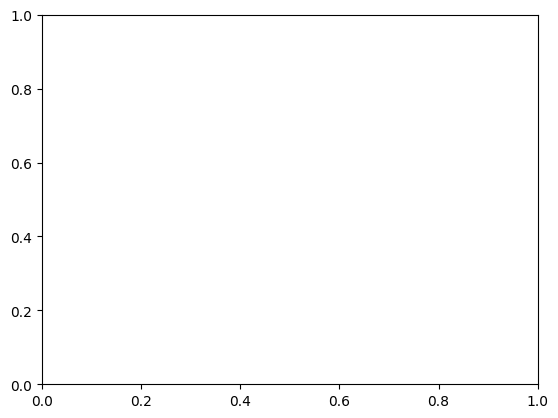

In [64]:
ax , fig = plt.subplots(nrows=1, ncols=1)

<AxesSubplot: xlabel="Hikaru's rating'", ylabel='Count'>

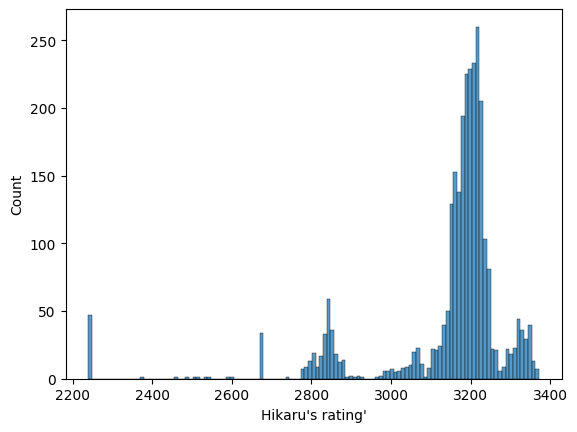

In [65]:
sns.histplot(data=all_months, x = player+"'s rating'")

<AxesSubplot: xlabel="opponent's rating'", ylabel='Count'>

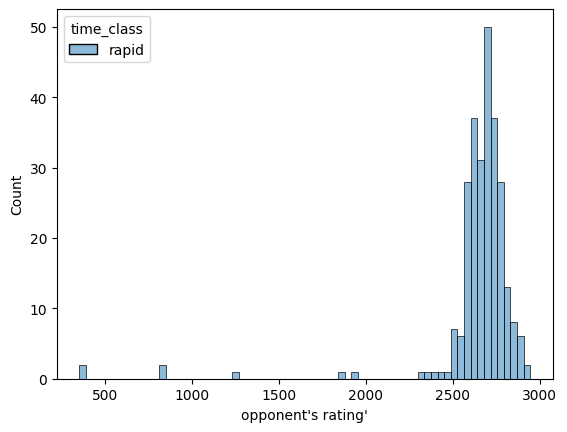

In [70]:
all_months_rapid = all_months[all_months.time_class=='rapid']
sns.histplot(data=all_months_rapid, x = "opponent's rating'", hue = 'time_class')

<AxesSubplot: xlabel="opponent's rating'", ylabel='Count'>

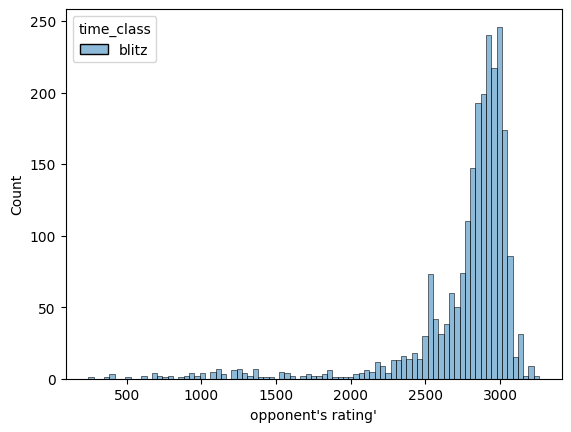

In [69]:
all_months_blitz = all_months[all_months.time_class=='blitz']
sns.histplot(data=all_months_blitz, x = "opponent's rating'", hue = 'time_class')

<AxesSubplot: xlabel="opponent's rating'", ylabel='Count'>

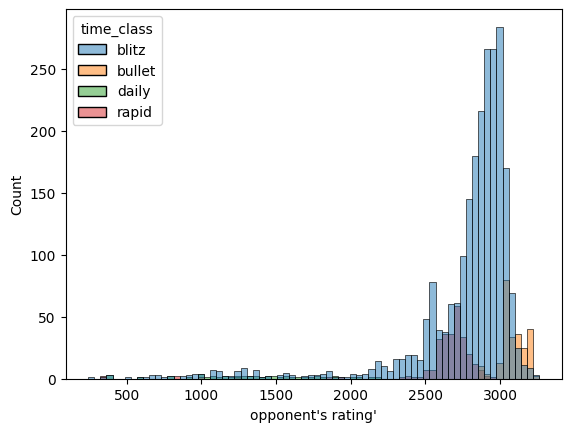

In [66]:
sns.histplot(data=all_months, x = "opponent's rating'", hue = 'time_class')

In [44]:
a = response = requests.get(data[0]).json()['games']

In [45]:
has_records = any(all_months['end_time'])

In [46]:
has_records

True

In [47]:
all_months.end_time.count()

2382

In [48]:
all_months.groupby('time_class').end_time.count()['blitz']

1675

In [49]:
all_months[all_months.time_class == 'daily'].shape[0]

0

<AxesSubplot: xlabel='count', ylabel='white.result'>

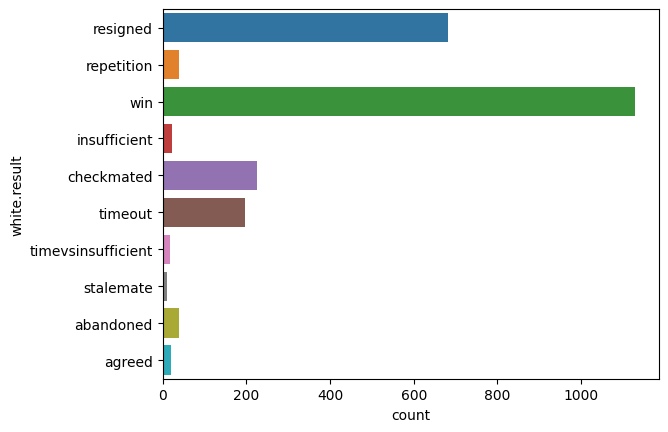

In [50]:
sns.countplot(data=all_months, y ='white.result')

In [51]:
all_months['accuracies.white'].count()

438

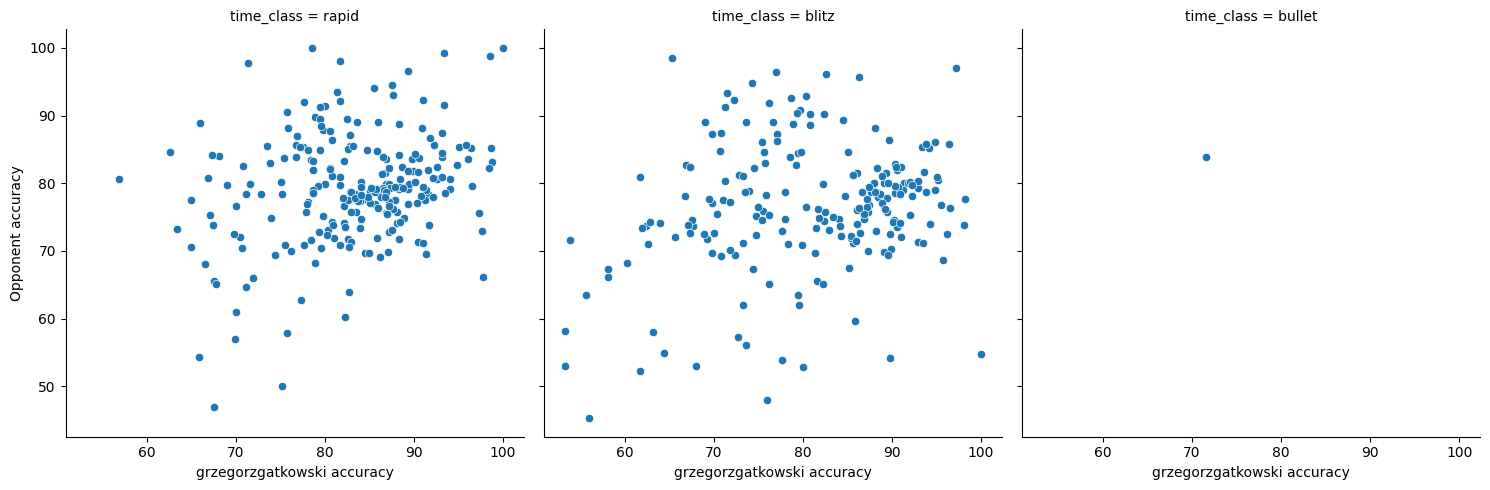

In [52]:
sns.relplot(data=all_months, x = player+" accuracy", y = 'Opponent accuracy', col = 'time_class', kind = 'scatter')

In [53]:
print(data)

['https://api.chess.com/pub/player/grzegorzgatkowski/games/2018/07', 'https://api.chess.com/pub/player/grzegorzgatkowski/games/2018/08', 'https://api.chess.com/pub/player/grzegorzgatkowski/games/2018/10', 'https://api.chess.com/pub/player/grzegorzgatkowski/games/2018/11', 'https://api.chess.com/pub/player/grzegorzgatkowski/games/2018/12', 'https://api.chess.com/pub/player/grzegorzgatkowski/games/2020/10', 'https://api.chess.com/pub/player/grzegorzgatkowski/games/2020/11', 'https://api.chess.com/pub/player/grzegorzgatkowski/games/2020/12', 'https://api.chess.com/pub/player/grzegorzgatkowski/games/2021/01', 'https://api.chess.com/pub/player/grzegorzgatkowski/games/2021/02', 'https://api.chess.com/pub/player/grzegorzgatkowski/games/2021/03', 'https://api.chess.com/pub/player/grzegorzgatkowski/games/2021/04', 'https://api.chess.com/pub/player/grzegorzgatkowski/games/2021/05', 'https://api.chess.com/pub/player/grzegorzgatkowski/games/2021/06', 'https://api.chess.com/pub/player/grzegorzgatko